In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# EDA

In [3]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df = df.drop(columns=["ID"])

In [7]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df["Income"]

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [9]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [10]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.duplicated().sum()

182

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
 for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique(), "\n")

Unique values in 'Education':
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] 

Unique values in 'Marital_Status':
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 

Unique values in 'Dt_Customer':
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-20

In [16]:
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']  
ordinal_encoder = OrdinalEncoder(categories=[education_order])
df['Education'] = ordinal_encoder.fit_transform(df[['Education']])

In [17]:
df = pd.get_dummies(df, columns=['Marital_Status'], prefix='Marital_Status')

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.month
df['Day_Joined'] = df['Dt_Customer'].dt.day

df['Days_Since_Joined'] = (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days

In [21]:
df

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Year_Joined,Month_Joined,Day_Joined,Days_Since_Joined
0,1957,2.0,58138.0,0,0,2012-09-04,58,635,88,546,...,False,False,True,False,False,False,2012,9,4,36
1,1954,2.0,46344.0,1,1,2014-03-08,38,11,1,6,...,False,False,True,False,False,False,2014,3,8,586
2,1965,2.0,71613.0,0,0,2013-08-21,26,426,49,127,...,False,False,False,True,False,False,2013,8,21,387
3,1984,2.0,26646.0,1,0,2014-02-10,26,11,4,20,...,False,False,False,True,False,False,2014,2,10,560
4,1981,4.0,58293.0,1,0,2014-01-19,94,173,43,118,...,False,True,False,False,False,False,2014,1,19,538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,2.0,666666.0,1,0,2013-06-02,23,9,14,18,...,False,False,False,True,False,False,2013,6,2,307
2235,1967,2.0,61223.0,0,1,2013-06-13,46,709,43,182,...,False,True,False,False,False,False,2013,6,13,318
2237,1981,2.0,56981.0,0,0,2014-01-25,91,908,48,217,...,True,False,False,False,False,False,2014,1,25,544
2238,1956,3.0,69245.0,0,1,2014-01-24,8,428,30,214,...,False,False,False,True,False,False,2014,1,24,543


In [22]:
df = df.drop(columns=['Dt_Customer'])

In [23]:
df.describe()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Joined,Month_Joined,Day_Joined,Days_Since_Joined
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,1968.787172,2.464043,52356.502445,0.445578,0.509232,48.951895,303.921769,26.234694,167.704568,37.329446,...,0.065598,0.012634,0.009718,3.0,11.0,0.152089,2013.031584,6.461613,15.669582,346.534985
std,11.973898,1.006020,25377.605248,0.537556,0.546489,28.999189,336.528217,39.750728,228.303238,54.657215,...,0.247638,0.111714,0.098124,0.0,0.0,0.359195,0.685621,3.502584,8.805281,202.164291
min,1893.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,1959.000000,2.000000,35701.750000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000,171.000000
50%,1970.000000,2.000000,52054.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000,347.000000
75%,1977.000000,3.000000,68242.500000,1.000000,1.000000,74.000000,504.000000,33.000000,229.500000,50.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2014.000000,10.000000,23.000000,520.000000
max,1996.000000,4.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000,699.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2058 non-null   int64  
 1   Education                2058 non-null   float64
 2   Income                   2058 non-null   float64
 3   Kidhome                  2058 non-null   int64  
 4   Teenhome                 2058 non-null   int64  
 5   Recency                  2058 non-null   int64  
 6   MntWines                 2058 non-null   int64  
 7   MntFruits                2058 non-null   int64  
 8   MntMeatProducts          2058 non-null   int64  
 9   MntFishProducts          2058 non-null   int64  
 10  MntSweetProducts         2058 non-null   int64  
 11  MntGoldProds             2058 non-null   int64  
 12  NumDealsPurchases        2058 non-null   int64  
 13  NumWebPurchases          2058 non-null   int64  
 14  NumCatalogPurchases      2058

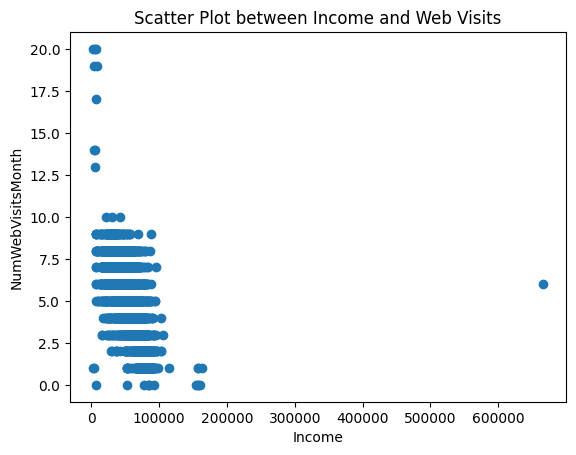

In [26]:
x_axis = df.loc[:, ['Income']]
y_axis = df.loc[:, ['NumWebVisitsMonth']]

plt.scatter(x_axis, y_axis)
plt.xlabel('Income')
plt.ylabel('NumWebVisitsMonth')
plt.title('Scatter Plot between Income and Web Visits')
plt.show()

# K-Means Model

In [27]:
kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(df)

KMeans(init='random', n_clusters=3)

In [28]:
pred = kmeans.predict(df)
pred

array([1, 1, 0, ..., 1, 0, 1])

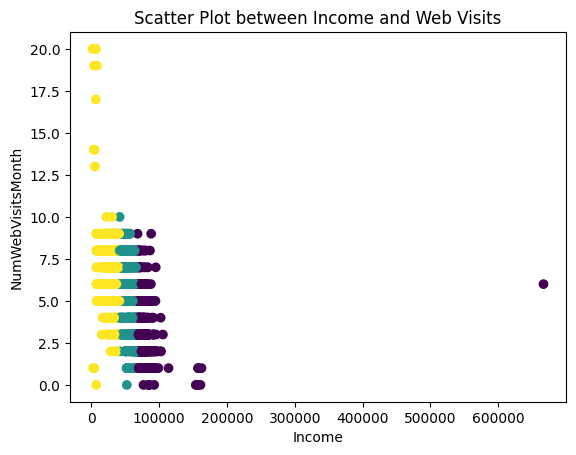

In [30]:
x_axis = df.loc[:, ['Income']]
y_axis = df.loc[:, ['NumWebVisitsMonth']]

plt.scatter(x_axis, y_axis , c=pred)
plt.xlabel('Income')
plt.ylabel('NumWebVisitsMonth')
plt.title('Scatter Plot between Income and Web Visits')
plt.show()

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

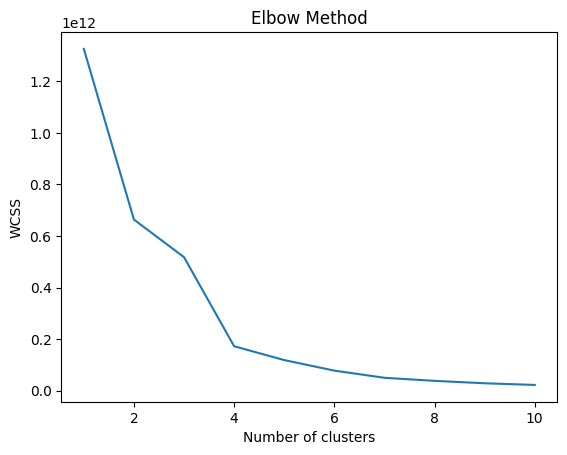

In [32]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [38]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, max_iter=300 , init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

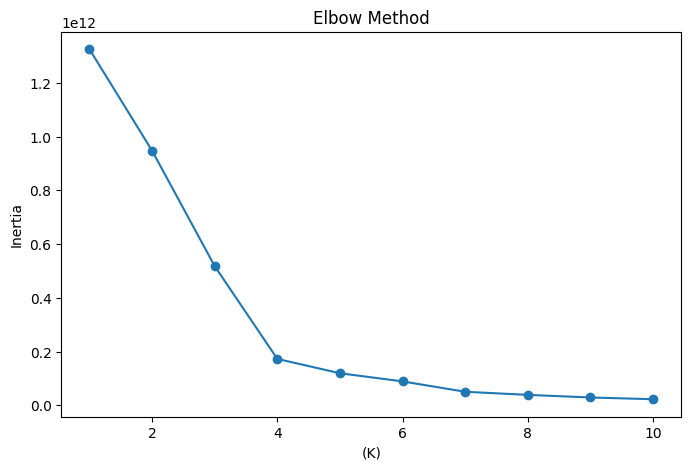

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('(K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [41]:
kmeans1 = KMeans(n_clusters=4, init='random')
kmeans1.fit(df)

KMeans(init='random', n_clusters=4)

In [43]:
pred1 = kmeans1.predict(df)
pred1

array([3, 3, 0, ..., 3, 0, 3])

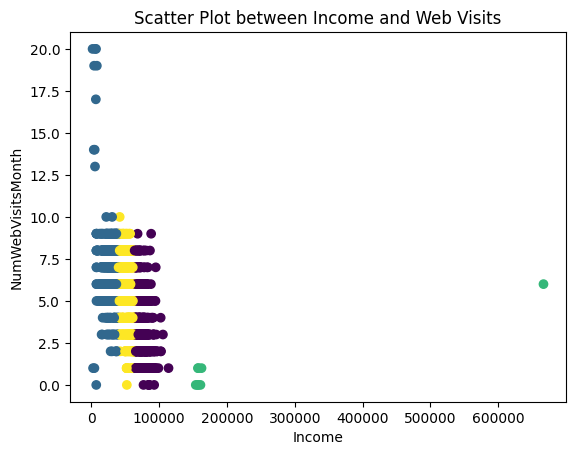

In [44]:
x_axis = df.loc[:, ['Income']]
y_axis = df.loc[:, ['NumWebVisitsMonth']]

plt.scatter(x_axis, y_axis , c=pred1)
plt.xlabel('Income')
plt.ylabel('NumWebVisitsMonth')
plt.title('Scatter Plot between Income and Web Visits')
plt.show()